 # SPAM SMS DETECTION

# ==========================================

#### WHAT IS SPAM SMS DETECTION SYSTEM ?

Spam SMS detection involves identifying and filtering unwanted text messages, typically sent in bulk, with the intention of advertising products, services, or phishing. It often relies on machine learning algorithms that analyze message content, sender behavior, and other patterns to differentiate between legitimate and spam messages. Some mobile devices and service providers use heuristics, blacklists, and user feedback to improve the accuracy of spam detection systems.

###### IMPORT PAKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import nltk
from nltk import word_tokenize
import string
import re

###### LOAD DATASET

In [3]:
df=pd.read_csv("F:/CODE SOFT/SPAM DETECTION/spam.csv",encoding='latin1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
new_col={'v1':'TARGET','v2':'SMS'}
df.rename(columns=new_col,inplace=True)

In [10]:
df

,TARGET,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.describe()

,TARGET,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
df.isna().sum()

TARGET    0
SMS       0
dtype: int64

In [13]:
df.dtypes

TARGET    object
SMS       object
dtype: object

In [14]:
df

,TARGET,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
Review=df['SMS']
Review

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: SMS, Length: 5572, dtype: object

In [16]:
tokens=[]

for i in Review:
    each_word=word_tokenize(i)
    tokens.extend(each_word)

tokens

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...',
 'Ok',
 'lar',
 '...',
 'Joking',
 'wif',
 'u',
 'oni',
 '...',
 'Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005',
 '.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question',
 '(',
 'std',
 'txt',
 'rate',
 ')',
 'T',
 '&',
 'C',
 "'s",
 'apply',
 '08452810075over18',
 "'s",
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 '...',
 'U',
 'c',
 'already',
 'then',
 'say',
 '...',
 'Nah',
 'I',
 'do',
 "n't",
 'think',
 'he',
 'goes',
 'to',
 'usf',
 ',',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 '

In [17]:
lower=[i.lower() for i in tokens]

lower

['go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'there',
 'got',
 'amore',
 'wat',
 '...',
 'ok',
 'lar',
 '...',
 'joking',
 'wif',
 'u',
 'oni',
 '...',
 'free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 '.',
 'text',
 'fa',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question',
 '(',
 'std',
 'txt',
 'rate',
 ')',
 't',
 '&',
 'c',
 "'s",
 'apply',
 '08452810075over18',
 "'s",
 'u',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 '...',
 'u',
 'c',
 'already',
 'then',
 'say',
 '...',
 'nah',
 'i',
 'do',
 "n't",
 'think',
 'he',
 'goes',
 'to',
 'usf',
 ',',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'freemsg',
 'hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'i',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 '

In [18]:
punct=string.punctuation

fill=[i for i in lower if i not in punct]

fill

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 '..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'there',
 'got',
 'amore',
 'wat',
 '...',
 'ok',
 'lar',
 '...',
 'joking',
 'wif',
 'u',
 'oni',
 '...',
 'free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 "'s",
 'apply',
 '08452810075over18',
 "'s",
 'u',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 '...',
 'u',
 'c',
 'already',
 'then',
 'say',
 '...',
 'nah',
 'i',
 'do',
 "n't",
 'think',
 'he',
 'goes',
 'to',
 'usf',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'freemsg',
 'hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 'i',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok'

In [19]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
remove = ['don', "don't", 'should', "aren'", "aren't", "couldn'", "couldn't",
          "didn'", "didn't", "doesn'", "doesn't", "hadn'", "hadn't", "hasn'",          
          "hasn't", "haven'", "haven't", "isn'", "isn't", "mightn'", "mightn't",
          "mustn'", "mustn't", "needn'", "needn't", "shan'", "shan't", "shouldn'",
          "shouldn't", "wasn'", "wasn't", "weren'", "weren't", "won'", "won't",
          "wouldn'", "wouldn't"]

In [21]:
stop_words=set(stopwords)-set(remove)
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 "she's",
 "should've",
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'the

In [22]:
filter=[i for i in fill if i not in stop_words]

filter

['go',
 'jurong',
 'point',
 'crazy',
 '..',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'got',
 'amore',
 'wat',
 '...',
 'ok',
 'lar',
 '...',
 'joking',
 'wif',
 'u',
 'oni',
 '...',
 'free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 "'s",
 'apply',
 '08452810075over18',
 "'s",
 'u',
 'dun',
 'say',
 'early',
 'hor',
 '...',
 'u',
 'c',
 'already',
 'say',
 '...',
 'nah',
 "n't",
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 "'s",
 '3',
 'week',
 "'s",
 'word',
 'back',
 "'d",
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'å£1.50',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 "'melle",
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 's

In [23]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer

In [24]:
p_stemm=PorterStemmer()
s_stemm=SnowballStemmer(language='english')
lan_stemm=LancasterStemmer()

In [25]:
p_st=list(map(lambda x:p_stemm.stem(x),filter))
s_st=list(map(lambda x:s_stemm.stem(x),filter))
l_st=list(map(lambda x:lan_stemm.stem(x), filter))

In [26]:
pos=nltk.pos_tag(filter)
pos

[('go', 'VB'),
 ('jurong', 'JJ'),
 ('point', 'NN'),
 ('crazy', 'NN'),
 ('..', 'NNP'),
 ('available', 'JJ'),
 ('bugis', 'NN'),
 ('n', 'RB'),
 ('great', 'JJ'),
 ('world', 'NN'),
 ('la', 'NN'),
 ('e', 'FW'),
 ('buffet', 'NN'),
 ('...', ':'),
 ('cine', 'NN'),
 ('got', 'VBD'),
 ('amore', 'RB'),
 ('wat', 'JJ'),
 ('...', ':'),
 ('ok', 'JJ'),
 ('lar', 'NN'),
 ('...', ':'),
 ('joking', 'VBG'),
 ('wif', 'JJ'),
 ('u', 'JJ'),
 ('oni', 'NN'),
 ('...', ':'),
 ('free', 'JJ'),
 ('entry', 'NN'),
 ('2', 'CD'),
 ('wkly', 'JJ'),
 ('comp', 'NN'),
 ('win', 'VBP'),
 ('fa', 'JJ'),
 ('cup', 'NN'),
 ('final', 'JJ'),
 ('tkts', 'NN'),
 ('21st', 'CD'),
 ('may', 'MD'),
 ('2005', 'CD'),
 ('text', 'NN'),
 ('fa', 'NN'),
 ('87121', 'CD'),
 ('receive', 'JJ'),
 ('entry', 'NN'),
 ('question', 'NN'),
 ('std', 'VBD'),
 ('txt', 'JJ'),
 ('rate', 'NN'),
 ('c', 'NN'),
 ("'s", 'POS'),
 ('apply', 'JJ'),
 ('08452810075over18', 'CD'),
 ("'s", 'POS'),
 ('u', 'JJ'),
 ('dun', 'NNS'),
 ('say', 'VBP'),
 ('early', 'JJ'),
 ('hor', 'NN'),


In [27]:
vocab=set(filter)
vocab

{'1da',
 'top',
 'iff',
 'box1146',
 'call2optout/4qf2',
 'wannatell',
 'hill',
 'neglect',
 'houseful',
 'wisdom',
 'correct',
 'e-ternal',
 'unlimited',
 'assessment',
 'http//tms',
 'joking',
 'yam',
 'mee',
 'roomate',
 'misss',
 'open',
 'start',
 'guessing',
 'fact',
 'v.tired',
 'boatin',
 '4few',
 'please',
 'bread',
 'txtno',
 'released',
 'x',
 'guides',
 'telephone',
 'maxå£7',
 '15:26',
 'opinion',
 'underdtand',
 'gets',
 'genuine',
 'forå£38',
 '10:10',
 'expired',
 'owl',
 '2.15',
 'tomo',
 'mushy',
 'concentrate',
 'video/pic',
 'somone',
 'exchanged',
 'aletter',
 '\\er',
 'icic',
 'bill',
 'thangam',
 'syria',
 'challenge',
 'searching',
 'ba128nnfwfly150ppm',
 'nookii',
 'loko',
 'wrote',
 'me.need',
 'brothers',
 'lancaster',
 '--',
 '08002888812',
 'lucozade',
 '08712400200',
 'yen',
 'hopefully',
 'weed',
 'involve',
 'necklace',
 'complexities',
 'paris.free',
 'wanted',
 '330',
 'expression',
 'beach',
 'practical',
 'slovely',
 'networks',
 'mudyadhu',
 'free',

In [28]:
bow={word:index for index,word in enumerate(filter)}
bow

{'go': 55977,
 'jurong': 1,
 'point': 55730,
 'crazy': 55538,
 '..': 55944,
 'available': 48141,
 'bugis': 51017,
 'n': 54750,
 'great': 56082,
 'world': 55539,
 'la': 52396,
 'e': 54657,
 'buffet': 3954,
 '...': 56120,
 'cine': 38858,
 'got': 55952,
 'amore': 16,
 'wat': 55786,
 'ok': 56042,
 'lar': 54827,
 'joking': 55095,
 'wif': 54824,
 'u': 56098,
 'oni': 54489,
 'free': 56135,
 'entry': 54331,
 '2': 56102,
 'wkly': 54333,
 'comp': 54334,
 'win': 55177,
 'fa': 11849,
 'cup': 48118,
 'final': 54217,
 'tkts': 30547,
 '21st': 16468,
 'may': 55503,
 '2005': 20039,
 'text': 56087,
 '87121': 44908,
 'receive': 54194,
 'question': 53947,
 'std': 52417,
 'txt': 55060,
 'rate': 54170,
 'c': 55300,
 "'s": 55989,
 'apply': 52422,
 '08452810075over18': 11860,
 'dun': 55604,
 'say': 56051,
 'early': 50096,
 'hor': 46067,
 'already': 55785,
 'nah': 44634,
 "n't": 56063,
 'think': 55926,
 'goes': 55380,
 'usf': 48986,
 'lives': 44426,
 'around': 54802,
 'though': 55626,
 'freemsg': 46595,
 'hey'

In [29]:
df

,TARGET,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='TARGET', ylabel='count'>

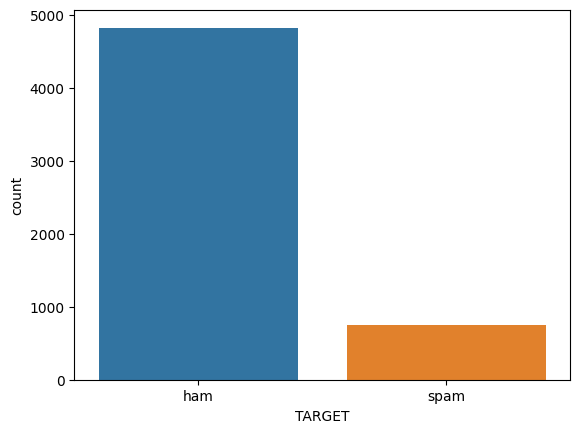

In [30]:
sns.countplot(df,x='TARGET')

In [31]:
x=df['SMS']
y=df['TARGET'].replace({'ham':1,'spam':0})

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [34]:
count_vectorizer=CountVectorizer()
tfidf_vectorizer=TfidfVectorizer()

x_train_count=count_vectorizer.fit_transform(x_train)
x_train_tfidf=tfidf_vectorizer.fit_transform(x_train)

x_test_count=count_vectorizer.fit_transform(x_test)
x_test_tfidf=tfidf_vectorizer.fit_transform(x_test)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform on the training data
x_train_count = count_vectorizer.fit_transform(x_train)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data
x_test_count = count_vectorizer.transform(x_test)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# MODEL 1: NAIVE-BAYES

In [36]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()


model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [37]:
predictions = model.predict(x_test_tfidf)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("ACCURACY :",accuracy)
print(report)

ACCURACY : 0.9596412556053812
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       150
           1       0.96      1.00      0.98       965

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



# MODEL 2: LOGISTIC REGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


model.fit(x_train_tfidf, y_train)

LogisticRegression()

In [40]:
predictions = model.predict(x_test_tfidf)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("ACCURACY :",accuracy)
print(report)

ACCURACY : 0.9668161434977578
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       150
           1       0.97      1.00      0.98       965

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115



# MODEL 3: SUPPORT VECTOR MACHINES

In [42]:
from sklearn.svm import SVC

model = SVC()


model.fit(x_train_tfidf, y_train)

SVC()

In [43]:
predictions = model.predict(x_test_tfidf)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("ACCURACY :",accuracy)
print(report)

ACCURACY : 0.97847533632287
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       150
           1       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

